In [108]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd
import folium
from folium import IFrame
import base64
from mpl_toolkits.basemap import Basemap

In [116]:
data = pd.DataFrame({
   'lat':[140, -110, -135, -37, 122, 123, 126,-9, 78,5,123,-175,-67],
   'lon':[36, 22, 53, -14, 24, 23, 33,55, 10,57,30,60,5],
   'name':['Japan', 'Mexico', 'Canada', 'Brazil', 'Taiwan', 
           'Taiwan','Korea','Scotland','India','Norway','China','Arctic','Venezuela'],
   'value':[1.45,0.62,0.7,0.83,0.64,2.73,7.04,0.56, 1.16,2.14,1.65,0.64,1.19]
})
data
 
# Make an empty map
m = folium.Map(location=[20,0],
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{z}/{y}/{x}',
    attr='Tiles &copy; Esri &mdash; Source: Esri, DeLorme, NAVTEQ, USGS, Intermap, iPC, NRCAN, Esri Japan, METI, Esri China (Hong Kong), Esri (Thailand), TomTom, 2012',
    zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=str(data.iloc[i]['value'])+' ppm',
      radius=data.iloc[i]['value']*100000.0,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(m)


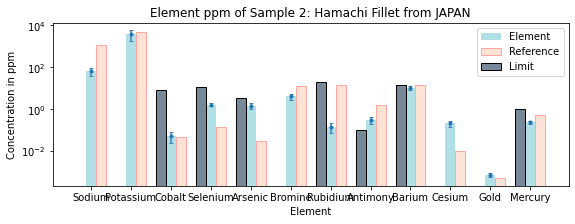

In [117]:
#Section that creates the first chart
#Japan Hamachi Fillet
station = '42'
resolution, width, height = 75, 9.5, 5

elements = ['Sodium', 'Potassium', 'Cobalt', 'Selenium', 'Arsenic', 'Bromine',
           'Rubidium', 'Antimony','Barium', 'Cesium', 'Gold', 'Mercury']

ppm = [64.70, 3780.58, 0.052, 1.63, 1.45, 4.15, 0.14, 0.31, 10.48, 0.212, 0.00075, 0.234]
x = np.linspace(1,len(ppm),len(ppm))

sys_unc = [28.48, 1935.24, 0.027, 0.18, 0.43, 1.32, 0.068, 0.08, 1.26, 0.057, 0.00014, 0.029]
stat_unc = [2.06, 790.84, 0.0059, 0.19, 0.14, 0.12, 0.014, 0.07, 1.81, 0.038, 0.00009, 0.031]
tot_unc = []
for i in x:
    val = (sys_unc[int(i)-1]**2+stat_unc[int(i)-1]**2)**0.5
    tot_unc.append(val)

mpl_fig = plt.figure(figsize=(9.25,3))
ax = mpl_fig.add_subplot(111)
w=0.25
p1 = ax.bar(x, ppm, w, color='powderblue', label='Element')

#reference values (based on averages)
ppm2 = [1120, 4912, 0.045, 0.142, 0.03, 13, 14.7, 1.5, 14.3, 0.01, 0.0005, 0.5]

#regulatory limits for the elements
limits = [0, 0, 8.48, 11.3, 3.5, 0, 20, 0.1, 14.3, 0, 0, 1]

#reference graph
p2 = ax.bar(x+0.25, ppm2, w, color='lightsalmon', edgecolor='red', alpha=0.3, label='Reference')
#error bars
p3 = plt.errorbar(x, ppm, yerr=tot_unc, fmt='.', ecolor='steelblue', capthick=1, capsize=2)
#limits graph
p4 = ax.bar(x-0.25, limits, w, color='lightslategray', edgecolor='k', label='Limit')

plt.xlabel('Element')
plt.ylabel('Concentration in ppm')
plt.title('Element ppm of Sample 2: Hamachi Fillet from JAPAN')
plt.legend()
plt.xticks(x, elements)
ax.set_yscale('log')

png = 'mpld3_{}.png'.format(station)
#mpl_fig.savefig(png, dpi=resolution)

#encoded = base64.b64encode(open(png, 'rb').read()).decode()

encoded = base64.b64encode(open('html/hamachi.jpeg', 'rb').read()).decode()


In [118]:
#Section that places the first pop up on the map

html="""
    <body style="border:3px; border-style:solid; border-color:navy; padding: 1em;">
    <center><h3>Chilean Sea Bass </h3></center>
    <p style="float: left; padding: 1px 30px 1px 1px">
    <img src="data:image/jpeg;base64,{}" style="width:300px;height:100px;" alt="Japan Concentrations">
    </p>
    <p style="padding: 1px 1px 10px 1px">
    <ul>
        <li><b>Location:</b> Japan</li>
        <li><b>Average size:</b> 4.5 kg</li>
        <li><b>Concentration:</b> 1.45 ppm</li>
        <li><b>Limit:</b> 3.5 ppm</li>
     </ul>
     </p>
     <p>
        Several arsenic mines are located in South East Asian countries. Although not safe, it is not uncommon
        for high levels of arsenic to be reported in farmed foods or water. A study done on these arsenic mines
        noted: " The oxidation process of arsenic-bearing sulfide ores has been noted as a risk factor for the 
        release of inorganic arsenic into soil and water in the vicinity of the mines." 
        Click <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3128386/">here</a> to read
         more on this study.
    </p>
    </body>
    """.format
iframe = IFrame(html(encoded), width=(width*resolution)+20, height=(height*resolution))
popup = folium.Popup(iframe, max_width=2650, min_width=(width*resolution)+20)

folium.Marker([33,126], popup=popup).add_to(m)
m.save('html/ArsenicMap.html')

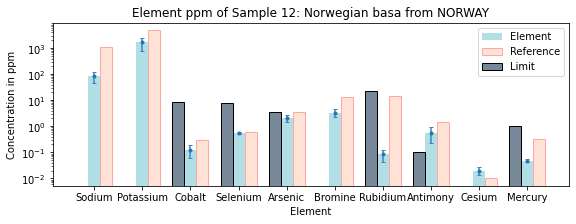

In [119]:
#Section that creates the second chart
#Norwegian Basa
station = '42'
resolution, width, height = 75, 9.5, 5

elements = ['Sodium', 'Potassium', 'Cobalt', 'Selenium', 'Arsenic', 'Bromine',
           'Rubidium', 'Antimony', 'Cesium', 'Mercury']

ppm = [85.33, 1652.5, 0.127, 0.56, 2.14, 3.38, 0.084, 0.5736, 0.02, 0.048]
x = np.linspace(1,len(ppm),len(ppm))

sys_unc = [37.58, 845.9, 0.064, 0.053, 0.64, 1.06, 0.04, 0.25, 0.0057, 0.006]
stat_unc = [1.83, 185.65, 0.017, 0.029, 0.22, 0.13, 0.013, 0.25, 0.0029, 0.0029]
tot_unc = []
for i in x:
    val = (sys_unc[int(i)-1]**2+stat_unc[int(i)-1]**2)**0.5
    tot_unc.append(val)

mpl_fig = plt.figure(figsize=(9.25,3))
ax = mpl_fig.add_subplot(111)
w=0.25
p1 = ax.bar(x, ppm, w, color='powderblue', label='Element')

#reference values (based on averages)
ppm2 = [1120, 4912, 0.3, 0.58, 3.5, 13, 14.7, 1.5, 0.01, 0.314]

#regulatory limits for the elements
limits = [0, 0, 8.48, 8, 3.5, 0, 23, 0.1, 0, 1]

#reference graph
p2 = ax.bar(x+0.25, ppm2, w, color='lightsalmon', edgecolor='red', alpha=0.3, label='Reference')
#error bars
p3 = plt.errorbar(x, ppm, yerr=tot_unc, fmt='.', ecolor='steelblue', capthick=1, capsize=2)
#limits graph
p4 = ax.bar(x-0.25, limits, w, color='lightslategray', edgecolor='k', label='Limit')

plt.xlabel('Element')
plt.ylabel('Concentration in ppm')
plt.title('Element ppm of Sample 12: Norwegian basa from NORWAY')
plt.legend()
plt.xticks(x, elements)
ax.set_yscale('log')

png = 'mpld3_{}.png'.format(station)
mpl_fig.savefig(png, dpi=resolution)

#encoded = base64.b64encode(open(png, 'rb').read()).decode()

encoded = base64.b64encode(open('html/norwegianbasa.jpeg', 'rb').read()).decode()


In [120]:
#Second pop up
html="""
    <body style="border:3px; border-style:solid; border-color:navy; padding: 1em;">
    <center><h3>Norwegian Basa </h3></center>
    <p style="float: left; padding: 1px 30px 1px 1px">
    <img src="data:image/jpeg;base64,{}" style="float:left; width:300px;height:100px;" alt="Norwegian Basa">
    </p>
    <p style="padding: 1px 1px 10px 1px">
    <ul>
        <li><b>Location:</b> Norway</li>
        <li><b>Average Size:</b> 3 kg </li>
        <li><b>Concentration:</b> 2.14 ppm</li>
        <li><b>Limit:</b> 3.5 ppm</li>
     </ul> 
     </p>
     <p>
        The concentrations of arsenic varied greatly in Norway from a study done in 2012.
        While the arsenic content of farmed food is very low, the amount found in fish surrounding the 
        Norwegian waters can be alarmingly high. This means the source of arsenic is coming from the ocean and 
        not from land. For more information on arsenic trends in Norway, click 
        <a href="https://www.ncbi.nlm.nih.gov/pubmed/24786400">here</a>.
    </p>
    </body>
    """.format
iframe = IFrame(html(encoded), width=(width*resolution)+20, height=(height*resolution))
popup = folium.Popup(iframe, max_width=2650, min_widt=(width*resolution)+20)

folium.Marker([57,5], popup=popup).add_to(m)

m.save('html/ArsenicMap.html')


In [121]:
m